# Import

In [1]:
from  PIL  import  Image
from lang_sam import LangSAM
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoImageProcessor, AutoModelForDepthEstimation
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from tqdm import tqdm


/home/keira/anaconda3/envs/multirecon/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# segmentation.py import
from segmentation import lsam, refine_masks, save_humans, save_test_humans

# depthestimation.py import
from depthestimation import depthv2, save_depth_image, extract_depth_from_masks

# calculation.py import
from calculation import (
    calculate_centers,
    get_single_depth_array,
    save_single_depth_images,
    calculate_normalized_depth_averages,
    normalize_centers,
    combine_normalized_coordinates
)

# display.py import
from display import plot_images_low_res, plot_images_high_res, result_high_res_save


# Segmemtation

In [3]:
# Image Path
image_path = "MultiImages/2.jpg"
original_image = cv2.imread(image_path)
image_size = (original_image.shape[:2])

# Segmentation
masks = lsam(image_path)

# Refine Masks
masks = refine_masks(masks)

# Save Single Human Image with Original Size
#save_humans(image_path, masks)

# Save Alpha Single Human Image for Test
save_test_humans(image_path, masks) 

Predicting 1 masks
Predicted 1 masks


/home/keira/anaconda3/envs/multirecon/lib/python3.11/site-packages/torchvision/transforms/functional.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


# Depth Estimation

In [4]:
# Depth Estimation
depth_array = depthv2(image_path)

# Save Depth Image
#save_depth_image(depth_array, image_path)


# Calculation

In [5]:
# Single Depth Array
single_depth_array = get_single_depth_array(masks, depth_array)

# Save Single Depth Images
#save_single_depth_images(single_depth_array)

# Normalized Depth Averages
normalized_depths = calculate_normalized_depth_averages(single_depth_array, depth_array)


# Calculate Centers
centers = calculate_centers(masks)

# Combine Normalized Coordinates
xyz = combine_normalized_coordinates(centers, normalized_depths)

# Display

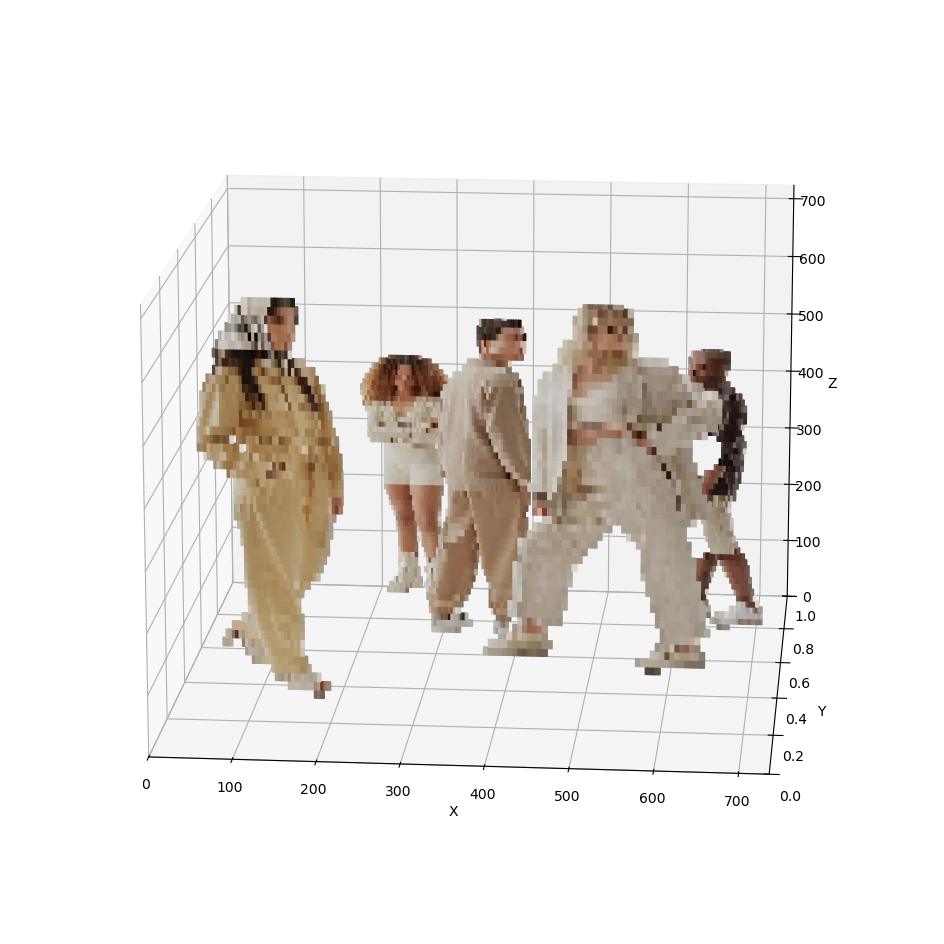

In [6]:
folder_path = 'TestSingleHuman'

# Low Resolution
plot_images_low_res(xyz, folder_path, image_size)

# High Resolution
#plot_images_high_res(xyz, folder_path, image_size)

In [7]:
# Save Result
result_high_res_save(xyz, "TestSingleHuman", image_size)

Rendering 3D images...


Processing images: 100%|██████████| 5/5 [00:09<00:00,  1.95s/image]


Saving high resolution image...


Saving image: 100%|██████████| 00:00

Image saved to DisplayResult/high_res_display.png
